## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import xlrd
from pandas import Series, DataFrame
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import os
import seaborn as sns
import sklearn.model_selection as ms
import sklearn.tree as tree
os.chdir("C:/Users/Administrator/Documents")

## Reading Data

In [3]:
dataset = pd.ExcelFile('data.xlsx')
data1 = dataset.parse('Employees who have left')
data1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


In [4]:
data2 = dataset.parse('Existing employees')
data2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [5]:
total_data = dataset.parse('total')
total_data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


#### Inputdata Description

In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
attrition                14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


#### Checking Dependent variable Propotion

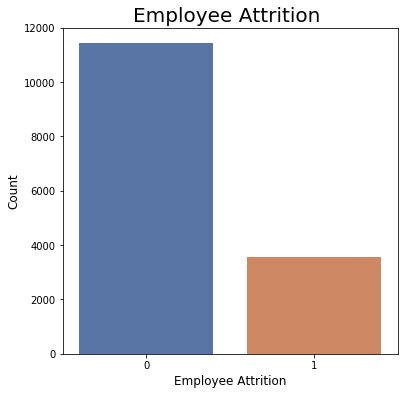

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(x = total_data.attrition,palette='deep')
plt.xlabel('Employee Attrition', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Employee Attrition ",fontsize= 20)
plt.show()

## Checking NA values

In [8]:
total_data.isna().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
attrition                0
dtype: int64

## Checking Outliers

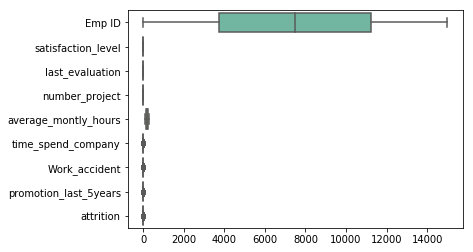

In [9]:
sb.boxplot(data=total_data, orient='h', palette='Set2')

## Distribution of Data

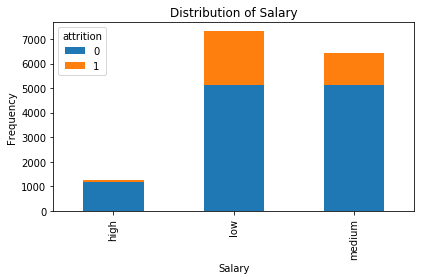

In [10]:
pd.crosstab(total_data.salary, total_data.attrition).plot(kind='bar', stacked = True)
plt.title("Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.tight_layout()

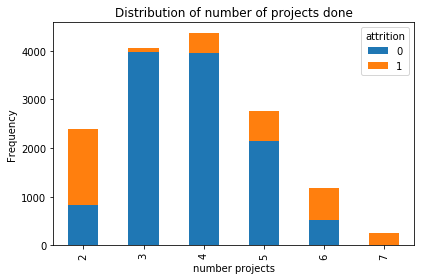

In [11]:
pd.crosstab(total_data.number_project, total_data.attrition).plot(kind='bar', stacked = True)
plt.title("Distribution of number of projects done")
plt.xlabel("number projects")
plt.ylabel("Frequency")
plt.tight_layout()

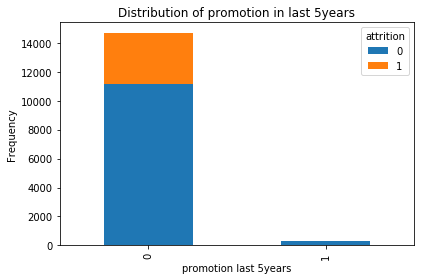

In [12]:
pd.crosstab(total_data.promotion_last_5years, total_data.attrition).plot(kind='bar', stacked = True)
plt.title("Distribution of promotion in last 5years")
plt.xlabel("promotion last 5years")
plt.ylabel("Frequency")
plt.tight_layout()

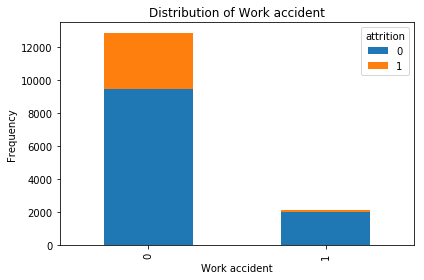

In [13]:
pd.crosstab(total_data.Work_accident, total_data.attrition).plot(kind='bar', stacked = True)
plt.title("Distribution of Work accident")
plt.xlabel("Work accident")
plt.ylabel("Frequency")
plt.tight_layout()

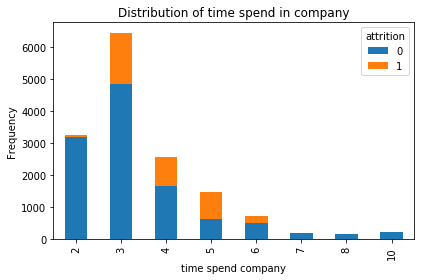

In [14]:
pd.crosstab(total_data.time_spend_company, total_data.attrition).plot(kind='bar', stacked = True)
plt.title("Distribution of time spend in company")
plt.xlabel("time spend company")
plt.ylabel("Frequency")
plt.tight_layout()

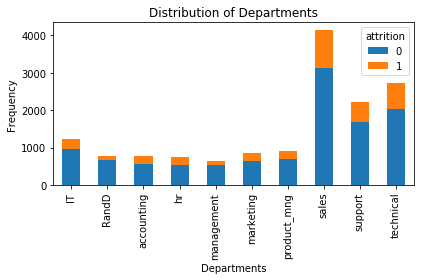

In [15]:
pd.crosstab(total_data.dept, total_data.attrition).plot(kind='bar', stacked = True)
plt.title("Distribution of Departments")
plt.xlabel("Departments")
plt.ylabel("Frequency")
plt.tight_layout()

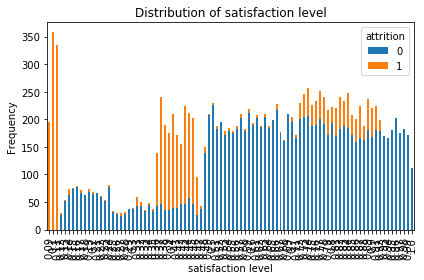

In [16]:
pd.crosstab(total_data.satisfaction_level, total_data.attrition).plot(kind='bar', stacked = True)
plt.title("Distribution of satisfaction level")
plt.xlabel("satisfaction level")
plt.ylabel("Frequency")
plt.tight_layout()

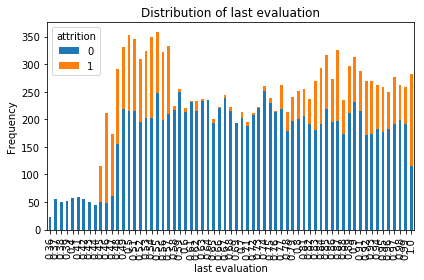

In [17]:
pd.crosstab(total_data.last_evaluation, total_data.attrition).plot(kind='bar', stacked = True)
plt.title("Distribution of last evaluation")
plt.xlabel("last evaluation")
plt.ylabel("Frequency")
plt.tight_layout()

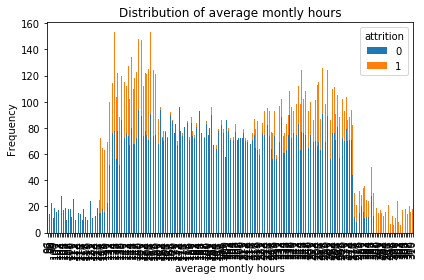

In [18]:
pd.crosstab(total_data.average_montly_hours, total_data.attrition).plot(kind='bar', stacked = True)
plt.title("Distribution of average montly hours")
plt.xlabel("average montly hours")
plt.ylabel("Frequency")
plt.tight_layout()

#### Drop Dependent Variable

In [19]:
X = total_data.drop(["Emp ID","attrition"], axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


#### Get Dummy Variables for Input Data

In [20]:
X=pd.get_dummies(X)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Dependent Value

In [21]:
y = total_data['attrition']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: attrition, dtype: int64

## Splitting Data into Train and Test in Ratio 8:2

In [22]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,y, \
                                        test_size=0.2, random_state = 200)

# Choosing Model

##### DecisionTree Classifier

In [53]:
model = tree.DecisionTreeClassifier(max_depth = 5, random_state=200 )
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')

In [59]:
model.score(X_train,y_train)

0.9759146595549629

In [56]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2241
           1       0.96      0.94      0.95       759

   micro avg       0.97      0.97      0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



#### Logistic Regression

In [63]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(random_state=101).fit(X_train,y_train)
logit_model

C:\software\Aana\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=101, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
logit_model.score(X_train,y_train)

0.7913159429952497

In [57]:
y_pred = logit_model.predict(X_test)
y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2241
           1       0.64      0.33      0.43       759

   micro avg       0.78      0.78      0.78      3000
   macro avg       0.72      0.63      0.65      3000
weighted avg       0.76      0.78      0.76      3000



#### RandomForest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train,y_train)
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [29]:
rf_model.score(X_train,y_train)

1.0

In [61]:
y_pred = rf_model.predict(X_test)
y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2241
           1       1.00      1.00      1.00       759

   micro avg       1.00      1.00      1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



#### KNN Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [65]:
knn_model.score(X_train,y_train)

0.9534127843986999

In [66]:
y_pred = knn_model.predict(X_test)
y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2241
           1       0.83      0.92      0.88       759

   micro avg       0.93      0.93      0.93      3000
   macro avg       0.90      0.93      0.92      3000
weighted avg       0.94      0.93      0.94      3000



#### Navie Model Development

In [67]:
from sklearn.naive_bayes import GaussianNB
Naive_model = GaussianNB().fit(X_train,y_train)
Naive_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [68]:
Naive_model.score(X_train,y_train)

0.6705558796566381

In [69]:
y_pred = Naive_model.predict(X_test)
y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75      2241
           1       0.43      0.83      0.57       759

   micro avg       0.68      0.68      0.68      3000
   macro avg       0.67      0.73      0.66      3000
weighted avg       0.79      0.68      0.70      3000



## Final Model

In [34]:
uniqueValues, occurCount = np.unique(y, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)
# probability of getting 0

Unique Values :  [0 1]
Occurrence Count :  [11428  3571]


In [35]:
pred = rf_model.predict_proba(X)
pred
#here first column is the probability that the output will be 0 and 0.762… is the probability of output being 1.

array([[0.  , 1.  ],
       [0.02, 0.98],
       [0.  , 1.  ],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [36]:
prediction = rf_model.predict(X)
uniqueValues, occurCount = np.unique(prediction, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [11442  3557]


In [37]:
rf_model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [38]:
importances = rf_model.feature_importances_
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False)

satisfaction_level       0.305423
number_project           0.194673
time_spend_company       0.178225
average_montly_hours     0.154004
last_evaluation          0.121761
Work_accident            0.010408
salary_low               0.007152
salary_high              0.004263
dept_technical           0.003330
dept_sales               0.003098
salary_medium            0.003049
dept_support             0.002618
promotion_last_5years    0.001892
dept_IT                  0.001684
dept_RandD               0.001596
dept_accounting          0.001581
dept_hr                  0.001547
dept_management          0.001455
dept_marketing           0.001141
dept_product_mng         0.001100
dtype: float64

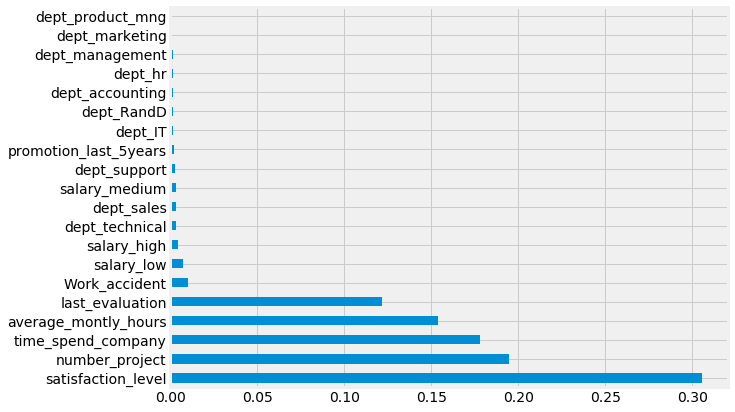

In [39]:
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
feat_importances.nlargest(100).plot(kind='barh')
plt.show()

In [40]:
import pydotplus
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

In [41]:
dot_data = tree.export_graphviz(model, out_file=None, \
                    feature_names=X.columns, class_names=["0","1"], \
                    filled=True, rounded= True, special_characters=True, \
                               proportion= True)

In [42]:
tree_image = pydotplus.graph_from_dot_data(dot_data)

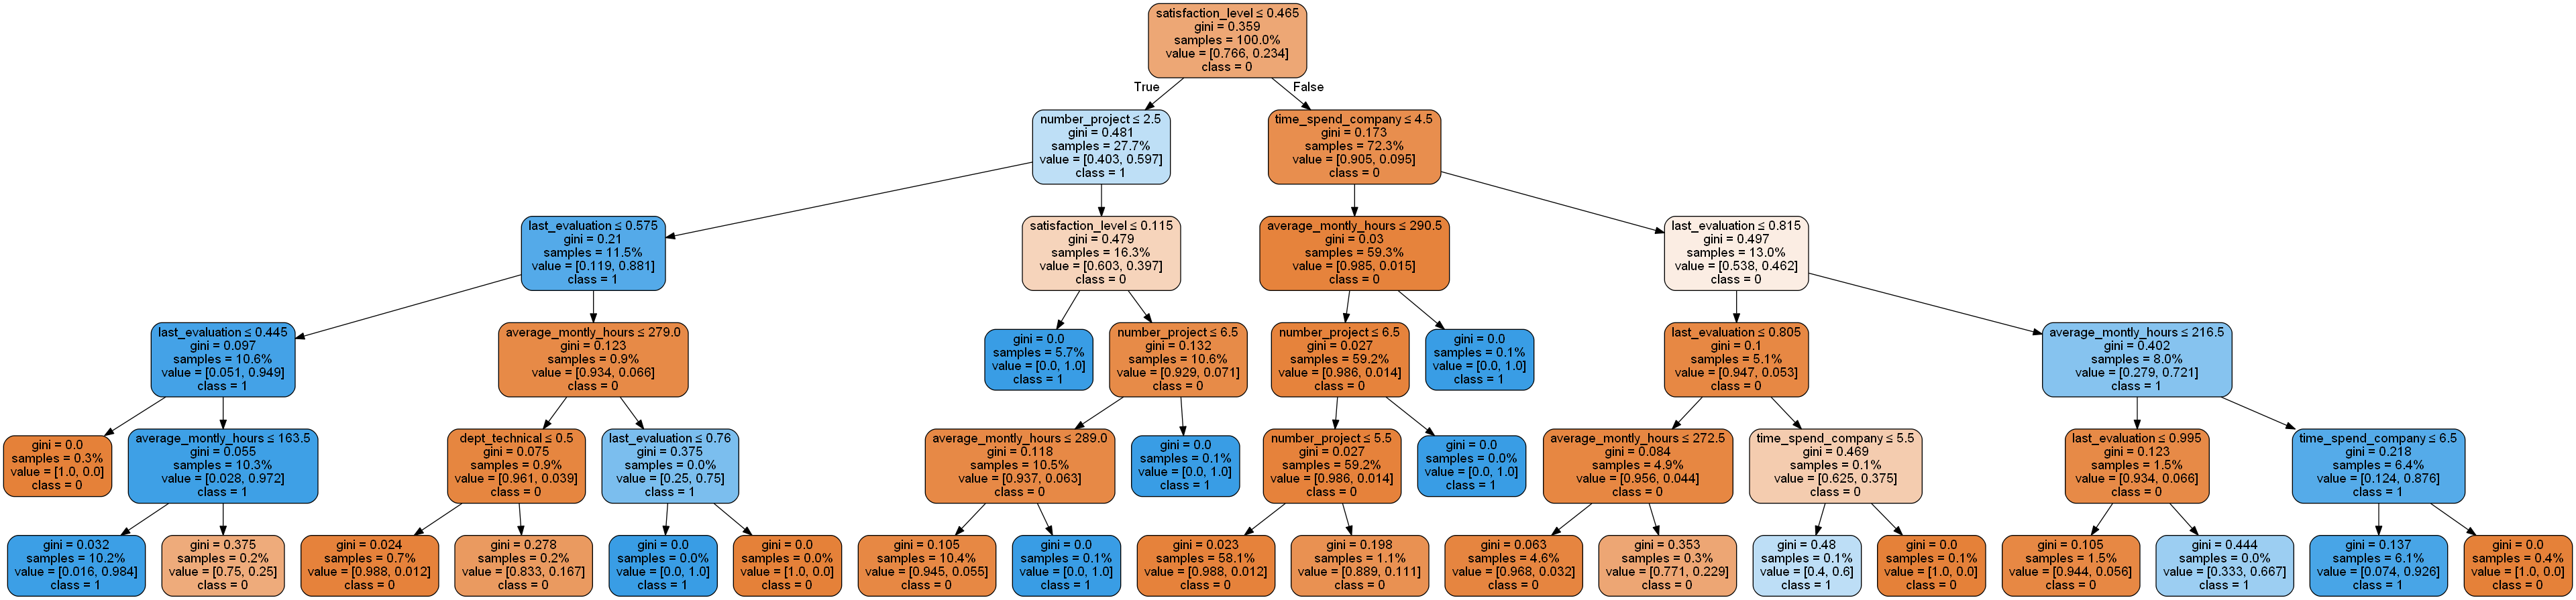

In [43]:
from IPython.display import Image
Image(tree_image.create_png())

ROC AUC: 1.00


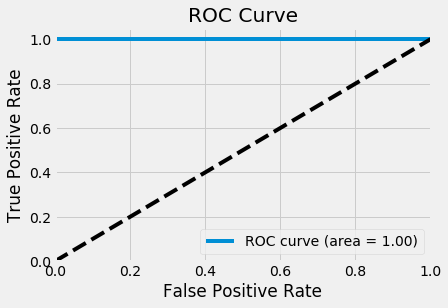

In [44]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
fpr, tpr, _ = roc_curve(y, rf_model.predict_proba(X)[:,1])
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Getting results

In [45]:
Z = data2.drop(["Emp ID","attrition"], axis=1)
Z.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.58,0.74,4,215,3,0,0,sales,low
1,0.82,0.67,2,202,3,0,0,sales,low
2,0.45,0.69,5,193,3,0,0,sales,low
3,0.78,0.82,5,247,3,0,0,sales,low
4,0.49,0.60,3,214,2,0,0,sales,low


In [46]:
Z=pd.get_dummies(Z)
Z.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [47]:
predZ = rf_model.predict_proba(Z)
predZ

array([[0.99, 0.01],
       [1.  , 0.  ],
       [0.98, 0.02],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [48]:
#probality of getting 1, if probability decresses then attrition also incress
my_pred = rf_model.predict_proba(Z)[:,1]
my_pred

array([0.01, 0.  , 0.02, ..., 0.  , 0.  , 0.  ])

In [49]:
uniqueValues, occurCount = np.unique(my_pred, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)
# probability of getting 1

Unique Values :  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.27 0.28 0.29 0.33
 0.34 0.35 0.36 0.37 0.38 0.41]
Occurrence Count :  [7870 1732  739  386  224  116  110   65   41   26   25   15   18    8
    2    4   10    3    6    3    4    4    3    2    3    1    1    1
    1    1    1    1    1    1]


In [50]:
tp = np.array(data2["Emp ID"])
tp.shape
fp = np.array(my_pred*100)
fp.shape

(11428,)

In [51]:
df = pd.DataFrame(data=[tp, fp]).T
df.columns = ['EMP_ID','Probalitity for Attrition']
df.to_csv("Employee_attrition.csv", sep=',', index=False)

In [52]:
result = df[(df['Probalitity for Attrition']> 20)]
result.to_csv("High_Attrition_Employee.csv", sep=',', index=False)